<H1 style = "font-size: 25px; 
background-color: #50C878; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Ramdom Forest Classification With Pipeline </H1>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/neerajprasad209/Dataset/main/Raisin_Dataset/Raisin_Dataset.csv')

In [4]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


<H1 style = "font-size: 25px; 
background-color: #50C878; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Exploratory Data Analysis </H1>

In [6]:
df['Class'].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [7]:
df['Class'] = df['Class'].map({'Kecimen':0, 'Besni':1})

In [8]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [9]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


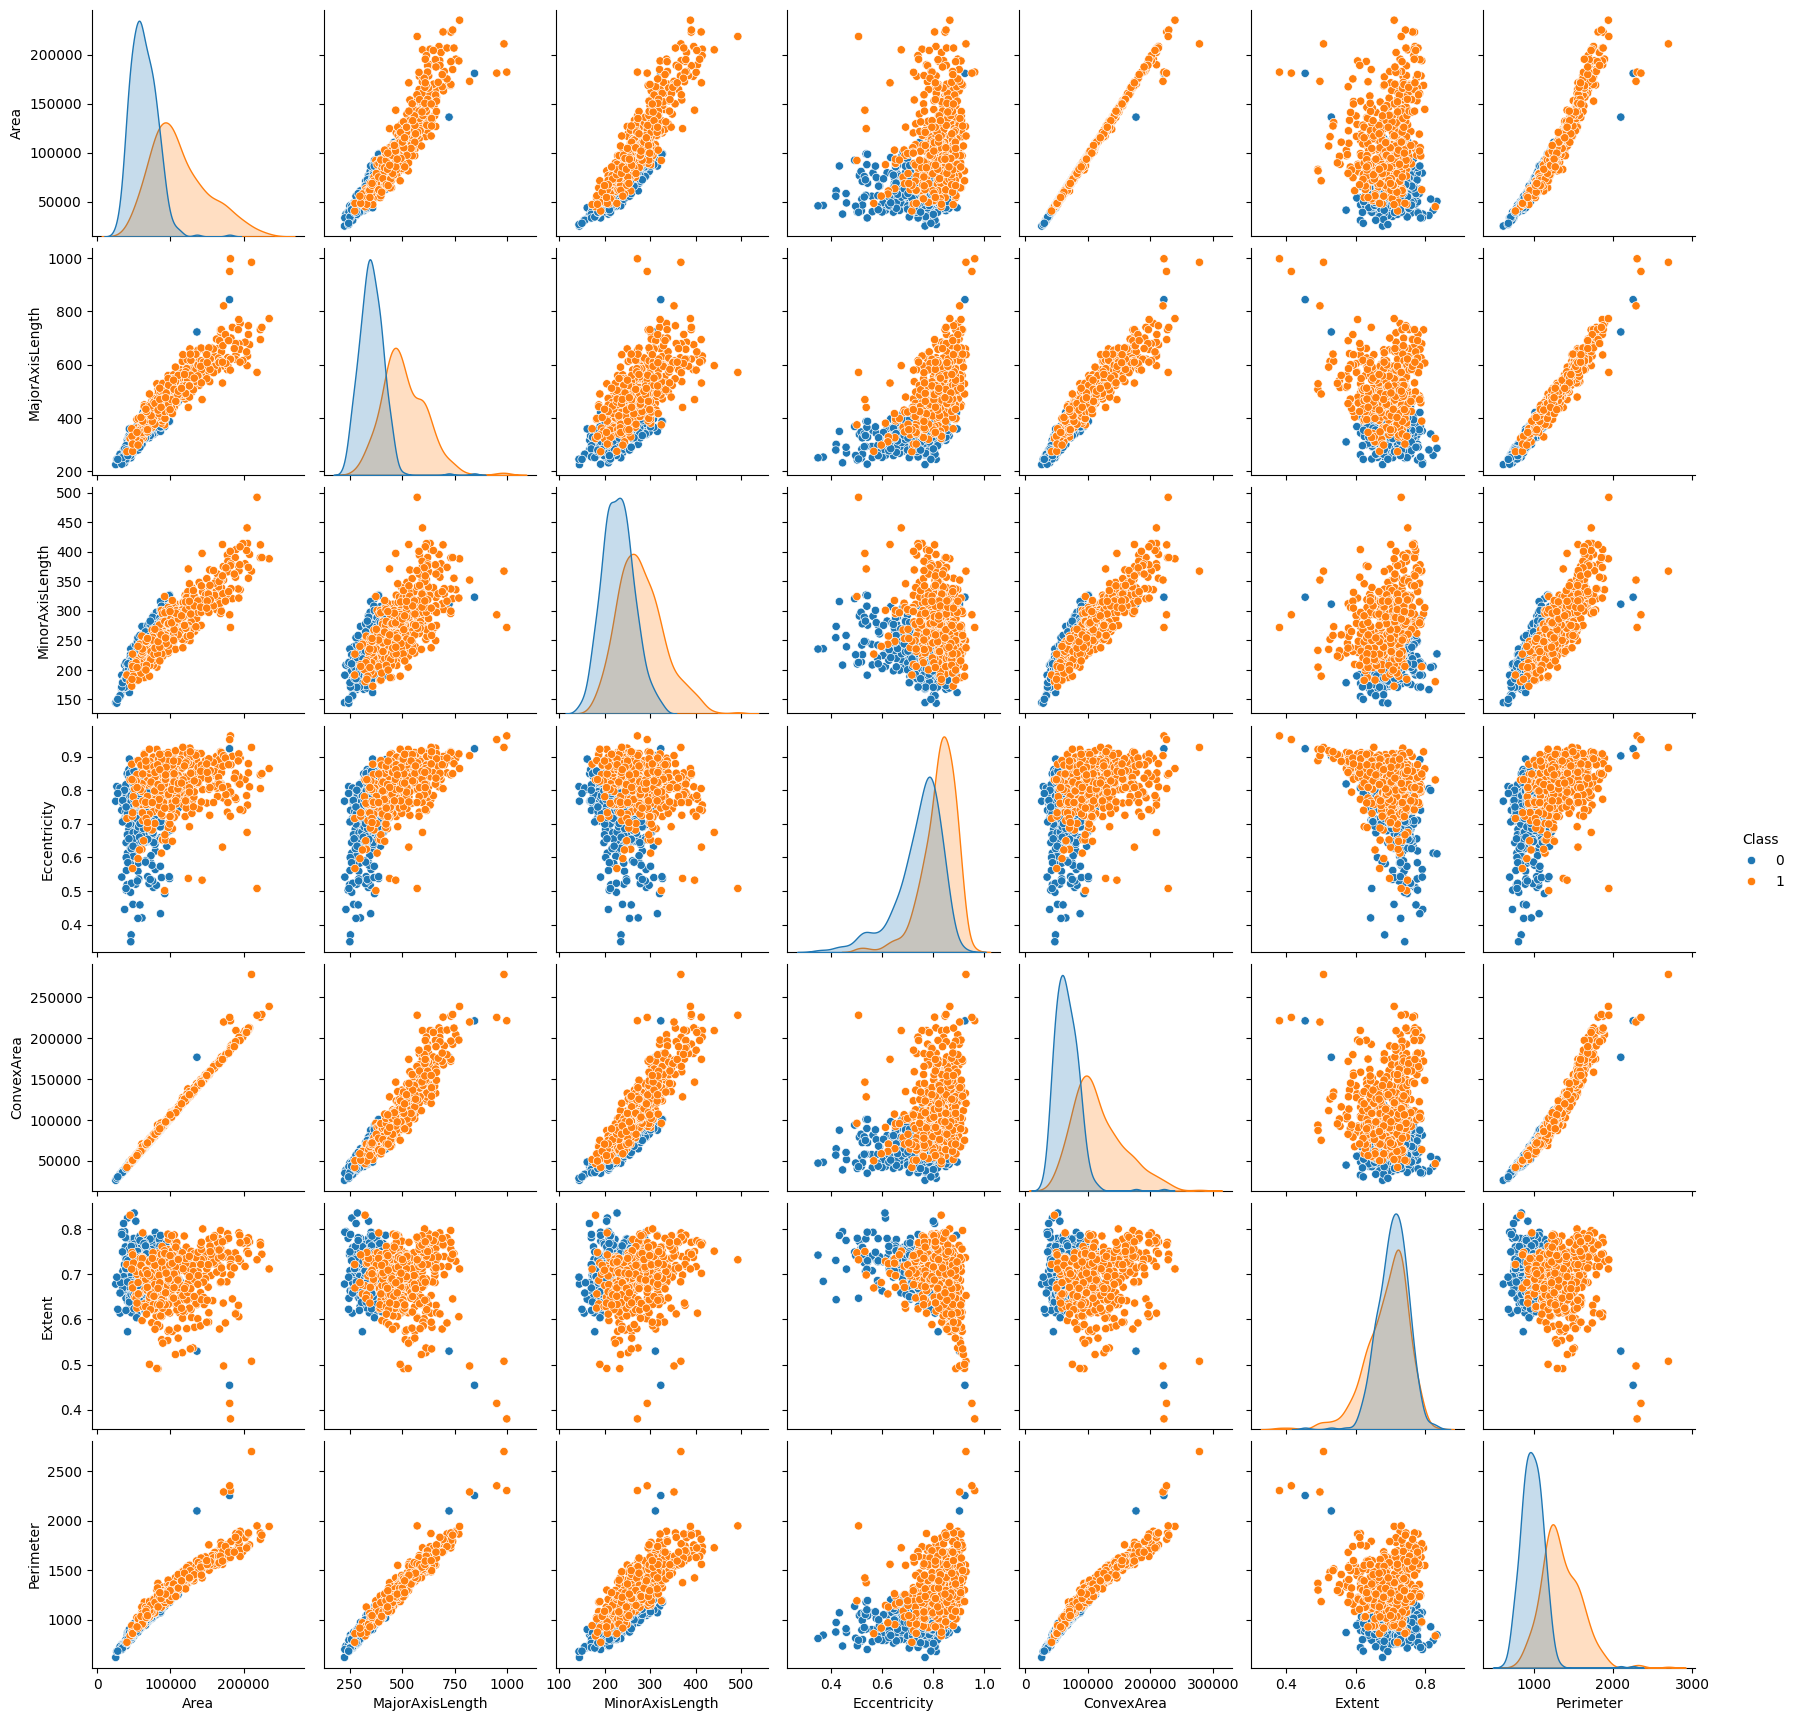

In [11]:
sns.pairplot(data=df,hue='Class')
plt.show()

<Axes: >

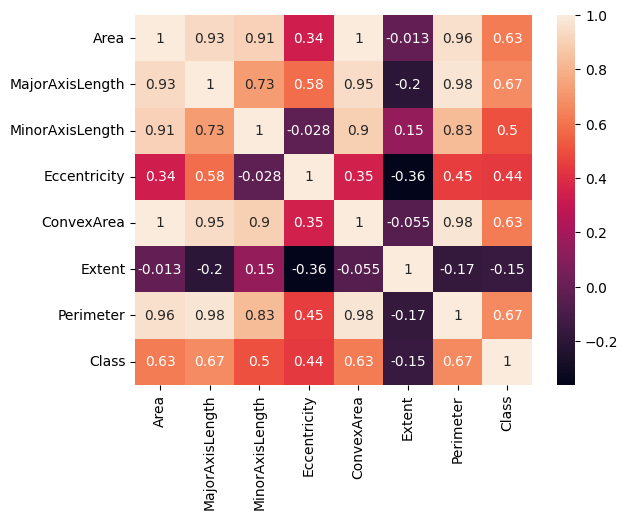

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
for i in (list(df.columns)):
    print(i)

Area
MajorAxisLength
MinorAxisLength
Eccentricity
ConvexArea
Extent
Perimeter
Class


In [15]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636,0.500000
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315,0.500278
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000,0.000000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750,0.000000
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000,0.500000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750,1.000000
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000,1.000000


In [16]:
df.drop(['Extent'],axis=1,inplace=True)

<H1 style = "font-size: 25px; 
background-color: #50C878; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Seperating the Independent and Dependent Variable </H1>

In [17]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,1184.040
1,75166,406.690687,243.032436,0.801805,78789,1121.786
2,90856,442.267048,266.328318,0.798354,93717,1208.575
3,45928,286.540559,208.760042,0.684989,47336,844.162
4,79408,352.190770,290.827533,0.564011,81463,1073.251


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

<H1 style = "font-size: 25px; 
background-color: #50C878; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Perfoming the Train Test Split </H1>

In [20]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.20, random_state=42)

In [21]:
Xtrain.shape, ytrain.shape

((720, 6), (720,))

In [22]:
Xtest.shape, ytest.shape

((180, 6), (180,))

In [23]:
num_cols = X.select_dtypes(include='number').columns

<H1 style = "font-size: 25px; 
background-color: #50C878; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Creating the Numerical and Categorical Pipeline for Imputing and Scaling  </H1>

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
# Numerical Pipeline_____________________________________________________________________________________________________________

num_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
preprocessing = ColumnTransformer([
    ('numerical_pipe', num_pipe, num_cols)
])

In [26]:
preprocessing

ColumnTransformer(transformers=[('numerical_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Perimeter'],
      dtype='object'))])

In [27]:
scaled_Xtrain = preprocessing.fit_transform(Xtrain)

In [28]:
scaled_Xtest = preprocessing.transform(Xtest)

<H1 style = "font-size: 25px; 
background-color: #50C878; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Random Forest Model Tranning  </H1>

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()

In [30]:
## Hypeparameter Tuning
params={'max_depth':[None,2,3,5,6],
        'n_estimators':[100,200,300],
        'criterion':['gini','entropy','log_loss'],
        'max_features': ['sqrt','log2',None]
}

In [31]:
from sklearn.model_selection import GridSearchCV

clf_rf = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy')

In [32]:
clf_rf.fit(scaled_Xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 3, 5, 6],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [33]:
clf_rf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [34]:
y_pred = clf_rf.predict(scaled_Xtest)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Accuracy Score : \n{accuracy_score(ytest,y_pred)}")
print("---------------------------------------------------------------------------------------------------------")
print(f"Classification Report : \n {classification_report(ytest,y_pred)}")

Accuracy Score : 
0.85
---------------------------------------------------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85        94
           1       0.83      0.86      0.85        86

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180




====================== Confusion Metrix ======================


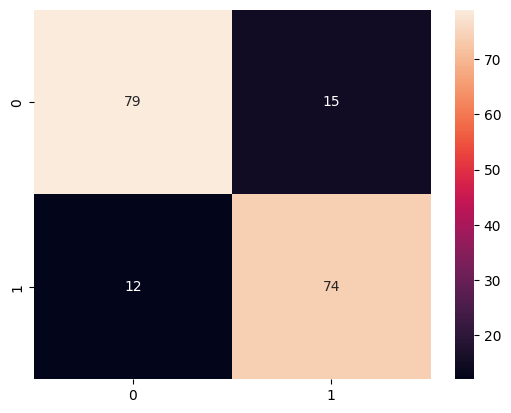

In [36]:
print("\n====================== Confusion Metrix ======================")
sns.heatmap(confusion_matrix(ytest,y_pred), annot=True)
plt.show()
